In [1]:
import math
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

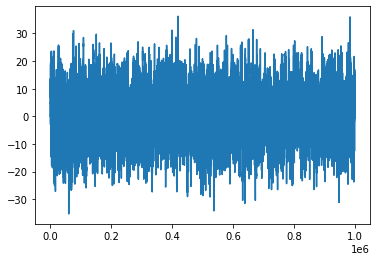

In [5]:
xdata=np.loadtxt("D:/...../ss.txt", comments="#", delimiter=",", unpack=False)
plt.plot(xdata)
plt.show()

In [32]:

@njit
def calmoment(x,tao,nofbin):
    steps=len(x)
    k1=np.zeros(nofbin)
    k2=np.zeros(nofbin)
    k4=np.zeros(nofbin)
    k6=np.zeros(nofbin)
    merror1=np.zeros(nofbin)
    merror2=np.zeros(nofbin)
    merror4=np.zeros(nofbin)
    merror6=np.zeros(nofbin)
    nbin=np.zeros(nofbin)
    nbini=np.zeros(steps)
    nbini[:]=-500
    narray=np.arange(nofbin) 
    xline=np.zeros(nofbin)       
    dx=(4*np.std(x))/nofbin
    xmin=np.mean(x)-2*np.std(x) 
    for i in range(nofbin):
        xline[i]=xmin+(i+0.5)*dx       
    for k in range(steps-1):
        i=int((x[k]-xmin)/dx)
        if i in narray:
            nbini[k]=i
            nbin[i]+=1
            k1[i]+=(x[k+1]-x[k])**1
            k2[i]+=(x[k+1]-x[k])**2
            k4[i]+=(x[k+1]-x[k])**4
            k6[i]+=(x[k+1]-x[k])**6     

    k1[:]=k1[:]/nbin[:]
    k2[:]=k2[:]/nbin[:]
    k4[:]=k4[:]/nbin[:]
    k6[:]=k6[:]/nbin[:]

    m1=k1/tao
    m2=k2/tao
    m4=k4/tao
    m6=k6/tao
    d1=(1/(1 ))*m1
    d2=(1/(2 ))*m2
    d4=(1/(24))*m4
    d6=(1/(720))*m6

    for k in range(steps-1):
        i=int(nbini[k])
        if i in narray:
            merror1[i]+=((((x[k+1]-x[k])**1)*(1/tao))-k1[i]/tao)**2
            merror2[i]+=((((x[k+1]-x[k])**2)*(1/tao))-k2[i]/tao)**2
            merror4[i]+=((((x[k+1]-x[k])**4)*(1/tao))-k4[i]/tao)**2
            merror6[i]+=((((x[k+1]-x[k])**6)*(1/tao))-k6[i]/tao)**2  

    for i in range(nofbin):
        merror1[i]=math.sqrt(merror1[i])/nbin[i]
        merror2[i]=math.sqrt(merror2[i])/nbin[i]
        merror4[i]=math.sqrt(merror4[i])/nbin[i]
        merror6[i]=math.sqrt(merror6[i])/nbin[i]  

    kerror1=merror1*tao
    kerror2=merror2*tao
    kerror4=merror4*tao
    kerror6=merror6*tao    
    derror1=merror1/1
    derror2=merror2/2
    derror4=merror4/24
    derror6=merror6/720

    return k1,k2,k4,k6,m1,m2,m4,m6,d1,d2,d4,d6,kerror1,kerror2,kerror4,kerror6,merror1,merror2,merror4,merror6,derror1,derror2,derror4,derror6




In [33]:
k1,k2,k4,k6,m1,m2,m4,m6,d1,d2,d4,d6,kerror1,kerror2,kerror4,kerror6,merror1,merror2,merror4,merror6,derror1,derror2,derror4,derror6=calmoment(xdata,0.001,21)

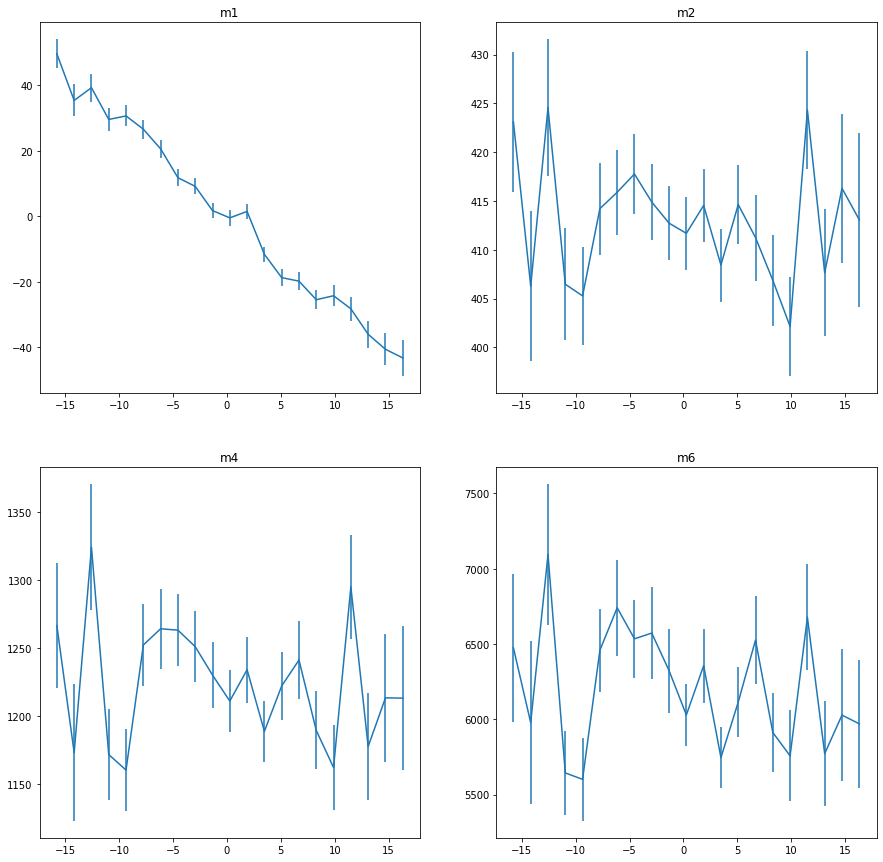

In [30]:
nofbin=21
tao=0.001
xline=np.zeros(nofbin)       
dx=(4*np.std(xdata))/nofbin
xmin=np.mean(xdata)-2*np.std(xdata) 
for i in range(nofbin):
    xline[i]=xmin+(i+0.5)*dx 

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.errorbar(xline,k1/tao,merror1)
#plt.plot(xline,yline1)
plt.title("m1")

plt.subplot(2,2,2)
plt.errorbar(xline,k2/tao,merror2)
plt.title("m2")


plt.subplot(2,2,3)
plt.errorbar(xline,k4/tao,merror4)
#plt.ylim([0,3000])
plt.title("m4")

plt.subplot(2,2,4)
plt.errorbar(xline,k6/tao,merror6)
plt.title("m6")
plt.show()

In [31]:
D1=np.polyfit(xline,d1,1,w=1/derror1)
D2=np.polyfit(xline,d2,2,w=1/derror2)
D4=np.polyfit(xline,d4,2,w=1/derror4)
D6=np.polyfit(xline,d6,2,w=1/derror6)